In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pdp
sns.set_style("ticks")

In [61]:
def sortconsole(df):  ##removes incomplete values, and sorts by Platform, then by name
    df1 = df.filter(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']).dropna().sort_values(by =['Platform','Name'])
    df1.index = range(0,len(df1.index))
    return df1


def available(df):   ## adds 4 columns with either 1 or 0, if 0 then the game is not available in the region designated by the column name
    NA = []
    for i in range(0,len(df.index)):
        if df['NA_Sales'][i] == 0.00:
            NA.append(0)
        else:
            NA.append(1)
    df['NA'] = NA
    
    JP = []
    for i in range(0,len(df.index)):
        if df['JP_Sales'][i] == 0.00:
            JP.append(0)
        else:
            JP.append(1)
    df['JP'] = JP
    
    EU = []
    for i in range(0,len(df.index)):
        if df['EU_Sales'][i] == 0.00:
            EU.append(0)
        else:
            EU.append(1)
    df['EU'] = EU
    
    OTHER = []
    for i in range(0,len(df.index)):
        if df['Other_Sales'][i] == 0.00:
            OTHER.append(0)
        else:
            OTHER.append(1)
    df['OTHER'] = OTHER
    return df



def popular(df):
    df = df.drop(df[df.Platform == ('GEN' or 'NG' or 'SCD' or 'WS' or '3DO' or 'TG16' or 'GG' or 'PCFX')].index )
    df.index = range(0,len(df.index))
    return df
    

research questions:
 - How many games are available on different consoles?
 - Are publishers fixed to one console, or how much do they vary?
 - Other differences between data for different consoles
 
Basic description:
The raw data was obtained from [kaggle]("https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings"), and is a user compiled data set which extends a scrape already performed by Metacritic. It includes over 16,000 entries, of which ~6,900 have all aspects complete. Each entry features a videogame and the console/platform it was released on, and entries include release dates from 1980 to 2016.
 

In [62]:
##import data and perform basic cleaning (i.e, removing unwanted columns and adding new columns)

df = pd.read_csv("https://github.com/data301-2020-winter2/course-project-group_1019/blob/main/data/raw/Video_Games_Sales_as_at_22_Dec_2016.csv?raw=true")
df = available(sortconsole(df))
print(len(df.index))

16416


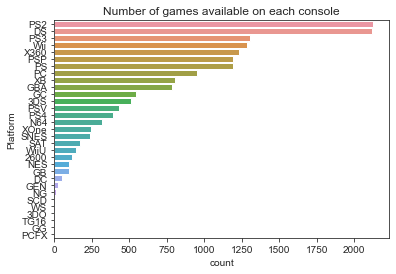

In [63]:

plot = sns.countplot(y = 'Platform',data = df,order = df['Platform'].value_counts().index).set_title("Number of games available on each console")

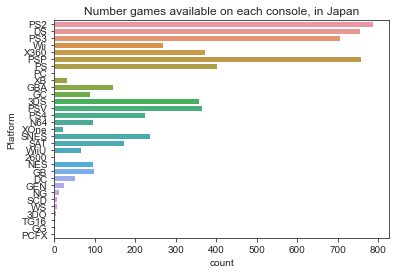

In [64]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.JP < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Japan")

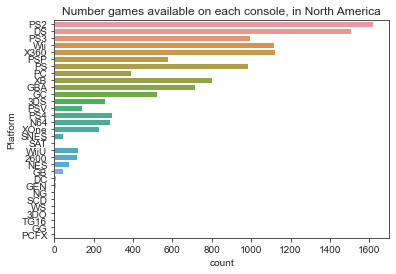

In [65]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.NA < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in North America")

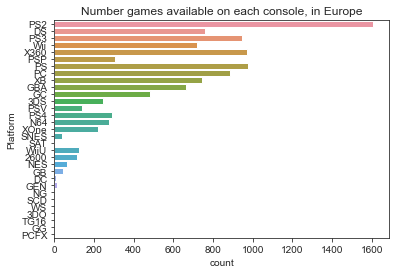

In [66]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.EU < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Europe")

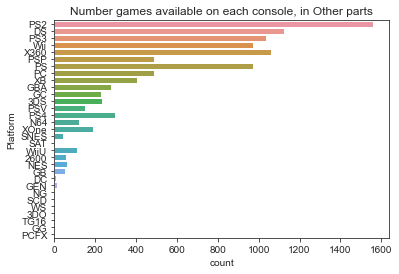

In [67]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.OTHER < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Other parts")


It would seem that all over the world the 3 consoles with the largest selection of games would be the PS2, followed by the DS, and then it would vary depending on which region of the world you were in. So the availability of different games on each console will change depending on which region of the world you are in. 
Something interesting to note is that Japan supposedly has 0 games available on PC which suggests that gaming on a computer is either non-existent or that not all games sales are accounted for; most likely the latter.
\n
we can also see that there are many consoles which have very few games associated with them, and so continuing with the analysis we will remove the games on those consoles, noting that they have few games listed.
(removing: ['GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG', 'PCFX'], i.e. the bottom 8 consoles, wrt number of entries)

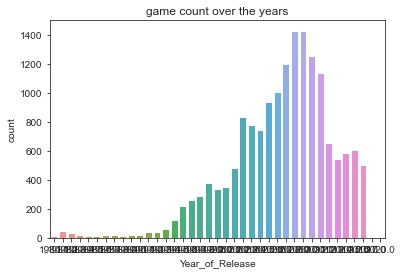

In [68]:
plot = sns.countplot(x = 'Year_of_Release',data = df).set_title("game count over the years")


This is a just a general idea for the distribution of games over the years 

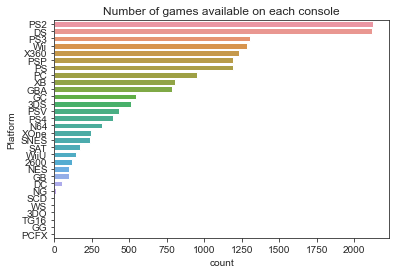

In [70]:
df = popular(df)
plot = sns.countplot(y = 'Platform',data = df,order = df['Platform'].value_counts().index).set_title("Number of games available on each console")